[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



 Number of Words =  1152

 Some Words: 
 ['Free', 'Tech', 'Resources', 'for', 'Students', 'Students', 'About', 'Partner', 'Volunteer', 'Donate']

FREQUENCY OF COMMON WORDS AND VISUALIZATION

 [('student', 18), ('free', 14), ('resource', 14), ('volunteer', 11), ('tool', 11), ('online', 10), ('school', 9), ('library', 7), ('thi', 6), ('google', 6), ('acces', 6), ('help', 6), ('different', 6), ('design', 6), ('college', 5)]


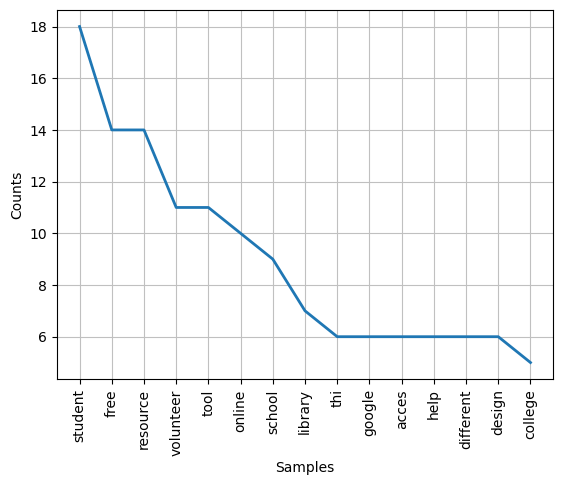


WORD FREQUENCY TABLE

         Words  Frequencies
3      student           18
0         free           14
2     resource           14
54        tool           11
5    volunteer           11
64      online           10
15      school            9
147    library            7
233     design            6
98       acces            6


In [77]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import word_tokenize
import matplotlib.pyplot as vis
from wordcloud import WordCloud
from collections import Counter
nltk.download("stopwords")


class ETL_Pipeline:
    def __init__(self, url):
        self.url = url
        
    def extract_data(self):
        html_data = requests.get(self.url).text
        soup = BeautifulSoup(html_data, "html.parser")
        text_data = soup.get_text()
        self.text_data = text_data

        
    def clean_and_tokenize(self):
        text_data = self.text_data
        all_words = word_tokenize(text_data)
        print('\n Number of Words = ', len(all_words))
        print('\n Some Words: \n', all_words[:10])
        stopword_data = set(stopwords.words("english"))
        
        remove_s = [word[:-1] if word.endswith('s') else word for word in all_words]
        
        cleaned_data = [words.lower() for words in remove_s if words.isalpha() and words.lower() not in stopword_data]
        self.cleaned_data = cleaned_data
        
        
    def visualize_and_freq(self):
        word_freq = FreqDist(self.cleaned_data)
        print('\nFREQUENCY OF COMMON WORDS AND VISUALIZATION')
        print('\n', word_freq.most_common(15))
        word_freq.plot(15)
        
        word_freq = Counter(self.cleaned_data)
        freq_table = pd.DataFrame(word_freq.items(), columns=["Words", "Frequencies"])
        freq_table = freq_table.sort_values(by="Frequencies", ascending=False)
        print("\nWORD FREQUENCY TABLE\n")
        print(freq_table.head(10))
        self.freq_table = freq_table
        
    
    def wordCloud_visualizer(self):
        print('\nWORD CLOUD VISUALIZATION OF COMMON WORDS')
        wordCloud_text = " ".join(self.cleaned_data)
        keywords = WordCloud().generate(str(wordCloud_text))
        vis.figure(figsize = (12,12))
        vis.axis("off")
        vis.imshow(keywords)
        vis.show()


    def load_to_cvs(self):
        self.freq_table.to_csv("Words_frequency.csv")
        
        
        
#Calling class drivers
url = "https://upchieve.org/blog/free-tech-resources-for-students"
handle = ETL_Pipeline(url)

#extract text from webpage
handle.extract_data()

#tokenize and clean data
handle.clean_and_tokenize()

#print word frequencies and visualize
handle.visualize_and_freq()




WORD CLOUD VISUALIZATION OF COMMON WORDS


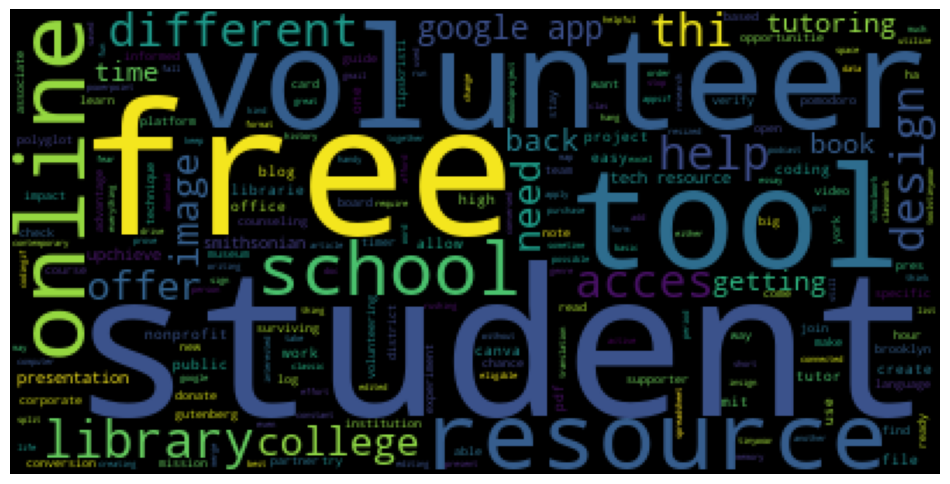

In [78]:
#visualize wordcloud
handle.wordCloud_visualizer()

#save words to cvs
handle.load_to_cvs()